### Problem: Experts say adults should limit screen time outside of work to two hours per day. Test if the mean amount of time students spend on the phone is 14 hours per week.

Ho: Students spend an average of 14 hours per week on phone.

Ha: The average phone screen time of students is significantly different from the recommended weekly amount of 14 hours.

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
import scipy.stats as stats
import pingouin as pg

In [3]:
# Load the data

students_data = pd.read_csv('Students Phone Time.csv')
pd.set_option('display.max_columns', 30)
students_data

,ID,Gender,Classification,Height,Shoe Size,Phone Time,# of Shoes,Birth order,Pets,Happy,Funny,College,Bfast Calories,Exercise,Stat Pre,Stat Post,Phone Type,Sleep,Social Media,Impact of SocNetworking,Political,Animal,Superhero
0,1,male,senior,67.75,7.0,12.0,12.0,youngest,5.0,0.80,7.0,Natural Sciences,500.0,360,3.0,NaN,iPhone,7.0,180.0,worse,Democrat,Dog person,Batman
1,2,male,freshman,71.00,7.5,1.5,5.0,middle,4.0,0.75,8.0,Natural Sciences,0.0,200,9.0,NaN,Android smartphone,7.0,20.0,better,Democrat,Dog person,Batman
2,3,female,freshman,64.00,6.0,25.0,15.0,oldest,8.0,0.90,6.0,Natural Sciences,200.0,30,7.0,5.0,Android smartphone,8.0,60.0,better,Republican,Dog person,Batman
3,4,female,freshman,63.00,6.5,30.0,30.0,middle,12.0,0.98,9.0,Education,200.0,180,6.0,7.0,iPhone,6.0,60.0,better,Republican,Both,Superman
4,5,male,senior,69.00,6.5,23.0,8.0,oldest,4.0,0.75,6.0,Natural Sciences,0.0,180,4.0,7.0,iPhone,5.5,60.0,worse,Independent,Dog person,Superman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,female,freshman,65.00,6.5,40.0,50.0,youngest,7.0,0.95,8.0,Nursing,2.0,30,4.0,8.0,iPhone,8.0,60.0,no impact,Independent,Dog person,Batman
72,73,female,freshman,62.00,7.0,60.0,8.0,only child,3.0,0.80,8.0,Undergraduate Studies,1000.0,0,3.0,6.0,iPhone,5.0,100.0,no impact,Republican,Both,Captain America
73,74,female,freshman,65.00,6.0,2.5,30.0,youngest,4.0,0.65,NaN,Natural Sciences,275.0,360,6.0,8.0,Android smartphone,5.0,60.0,worse,Independent,Both,Superman
74,75,female,sophomore,65.00,6.5,20.0,15.0,middle,4.0,0.90,8.0,Undergraduate Studies,250.0,120,6.0,NaN,iPhone,6.5,120.0,better,Democrat,Dog person,Superman


In [4]:
# Drop rows with missing values on Phone Time

screen_time = students_data['Phone Time'].dropna()
screen_time

0     12.0
1      1.5
2     25.0
3     30.0
4     23.0
      ... 
71    40.0
72    60.0
73     2.5
74    20.0
75    20.0
Name: Phone Time, Length: 75, dtype: float64

### Check for the assumptions of t-distribution

1. Independence - Sample must come from a simple random sample of a population.
2. Normality
    - If the sample size is less than 30 and there are no clear outliers in the data, then we typically assume that the data come from a nearly normal distribution to satisfy the condition.
    - If the sample size is at least 30 and there are no particularly extreme outliers, then we typically assume the sampling distribution of mean is nearly normal, even if the underlying distribution of individual observations is not.
    

<AxesSubplot:xlabel='Phone Time', ylabel='Count'>

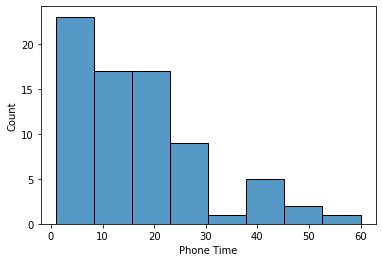

In [5]:
sns.histplot(screen_time)

<AxesSubplot:>

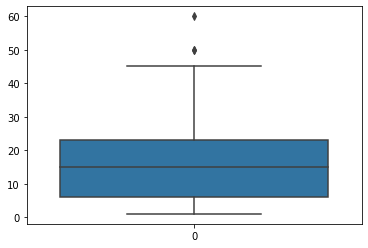

In [6]:
sns.boxplot(data=screen_time)

### Calculate the summary statistics of the sample

In [7]:
sample_mean = screen_time.mean()
sample_sd = statistics.stdev(screen_time)

print('Sample size:', len(screen_time))
print('Sample Mean:', sample_mean)
print('Sample SD:', sample_sd)


Sample size: 75
Sample Mean: 17.426666666666666
Sample SD: 13.450533329457492


With a sample of 75, we should only be concerned if there are particularly extreme outliers. The histogram of the data doesn’t show any outliers of concern.

### Perform one sample t-test using scipy library's ttest_1samp() function

In [8]:
stats.ttest_1samp(a=screen_time, popmean=14)

Ttest_1sampResult(statistic=2.206291981846915, pvalue=0.030467107847015493)

### Perform one sample t-test using Pingouin

In [9]:
pg.ttest(x=screen_time, y=14, paired=False, alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.206292,74,two-sided,0.030467,"[14.33, 20.52]",0.254761,1.24,0.586161


### Interpret the results in the context of data

Since the p-value of 0.03 is smaller than 0.05, the data provides strong evidence to reject the null hypothesis. The average phone screen time of students is significantly different from 14 hours. Since the sample mean is higher than 14, we can conclude that the on average, students spend more time on screen than the recommended weekly screen time of 14 hours per week.

We are 95% confident that students spend between 14.33 and 20.52 hours per week using their phones.